#Movies Rating IMDB Analysis
**Task Details**

Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform. Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.

**Analyze data and provide some trends.**
- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/IMDb Movies India.csv', encoding = 'latin-1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
#Check the shape of data
data.shape

(15509, 10)

In [ ]:
#to check the columns of data
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
# Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# To check null values in data

data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# To drop null values

data.dropna(inplace = True)

In [ ]:
# Top 10 values from data
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
# check the shape again
data.shape

(5659, 10)

#ANALYZING MOVIE RATINGS
***COUNT OF RATINGS***

In [ ]:
rating_count = data['Rating'].value_counts()
top_rating = rating_count.head(10)
top_rating

Rating
6.8    200
6.5    192
6.2    190
6.6    163
7.1    163
6.9    161
6.7    159
7.2    158
6.1    156
7.0    154
Name: count, dtype: int64

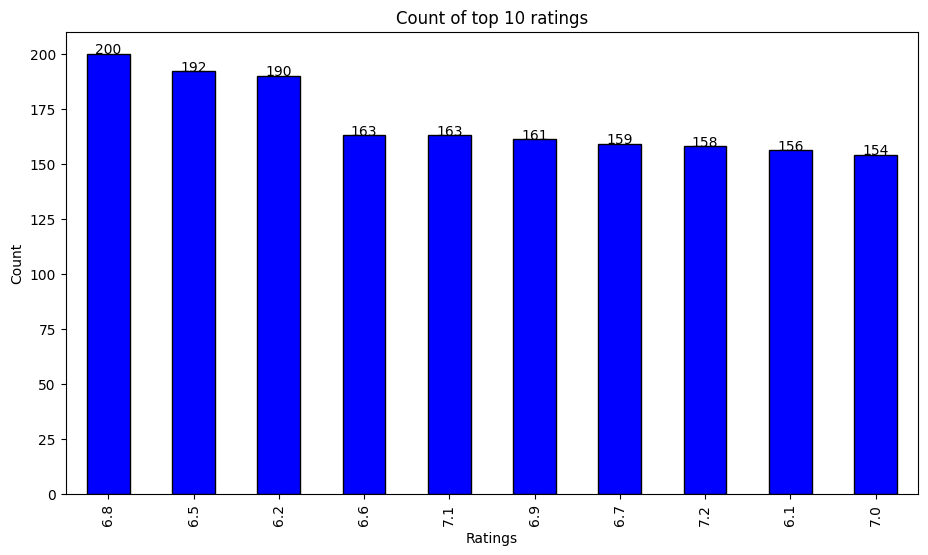

In [ ]:
plt.figure(figsize = (11,6))                                                       # We can count the rtings through seaborn library as wee
top_rating.plot(kind = 'bar', color = 'blue', edgecolor = 'black')                 # sns.count(data = data, x = 'rating', color = 'red')

for index, value in enumerate(top_rating):
  plt.text(index, value + 0.1, str(value), ha = 'center')

plt.title("Count of top 10 ratings")
plt.xlabel("Ratings")
plt.ylabel('Count')
plt.show()

#Year with best Rating

In [ ]:
# to calculate average rating

average_rating = data.groupby('Year')['Rating'].mean()
top_averga_rating = average_rating.sort_values(ascending = False).head(10)
top_averga_rating

Year
(1952)    7.212500
(1957)    7.080645
(1944)    7.075000
(1940)    7.050000
(1953)    6.955000
(1946)    6.933333
(1948)    6.920000
(1949)    6.915385
(1955)    6.848000
(1961)    6.836000
Name: Rating, dtype: float64

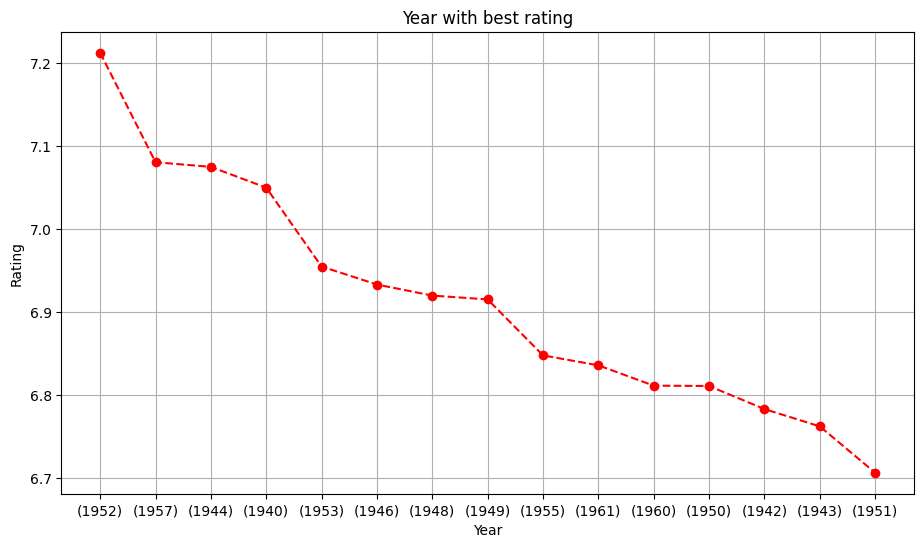

In [ ]:
plt.figure(figsize = (11,6))
plt.plot(top_average_rating.index, top_average_rating.values, color = 'red', marker = 'o', linestyle = '--')
plt.title("Year with best rating")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


#Observation:
` As per the above observation 1952 has the best year with the highest rating of 7.21

#Top 10 movies according to rating per year and overall.

In [ ]:
# Convert year into string
data['Year'] = data['Year'].astype(str)

In [ ]:
# Top 10 overall
top_10_overall = data.nlargest(10, 'Rating')
top_10_overall

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,Baikunth,(2021),72 min,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
11843,Refl3ct,(2021),65 min,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


In [ ]:
# Top 10 movies
movies_rating_per_year = data.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop = True)
top_10_movies_rating_per_year = movies_rating_per_year.head(50)
top_10_movies_rating_per_year

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,The Light of the World,(1931),124 min,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1,Draupadi,(1931),124 min,Drama,5.3,6,Bhagwati Prasad Mishra,Khalil,Ermeline,Jillo
2,Indrasabha,(1932),211 min,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
3,Fate,(1933),68 min,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
4,Mazdoor,(1934),155 min,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
5,Piya Pyare,(1934),144 min,"Adventure, Fantasy",2.7,11,R.S. Choudhury,Ruby Mayer,Dinshaw Bilimoria,Jillo
6,Inquilab,(1935),144 min,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
7,Miss Manorama,(1935),90 min,Drama,6.3,9,Faredoon A. Irani,Aghajani,Jehanara Kajjan,Agha Jani Kashmiri
8,Bhikharan,(1935),143 min,Drama,6.2,9,Premankur Atorthy,Rattan Bai,Master Vinayak,I.A. Hafizji
9,The Princess and the Hunter,(1935),164 min,"Action, Adventure",4.5,22,Homi Wadia,Fearless Nadia,Sharifa,Gulshan


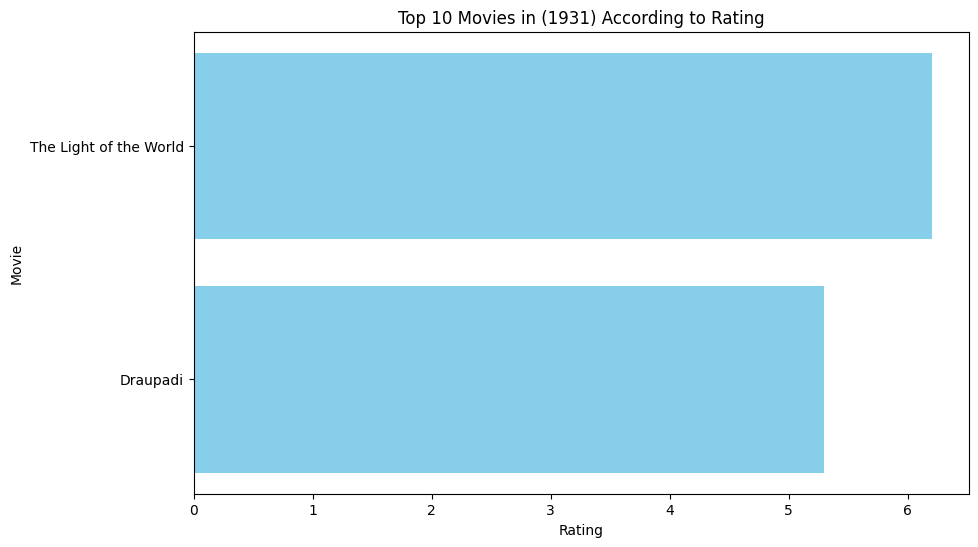

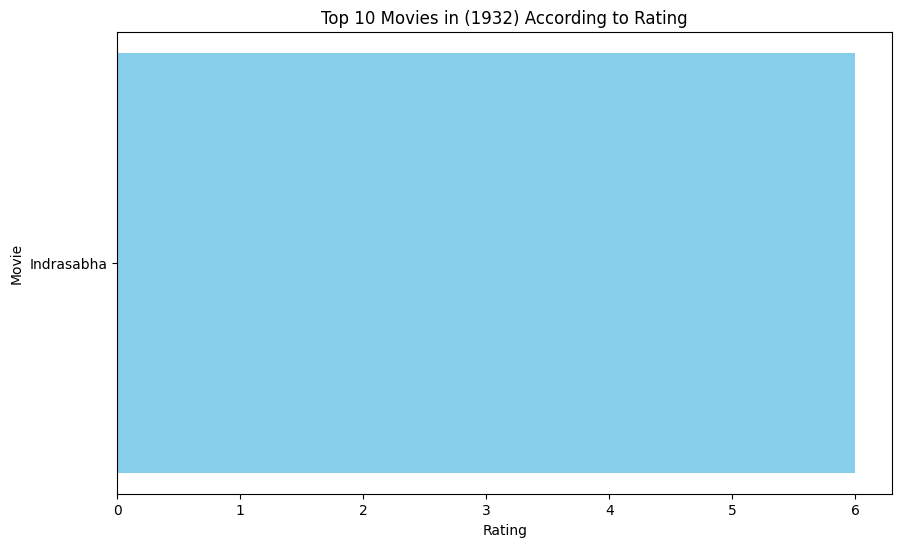

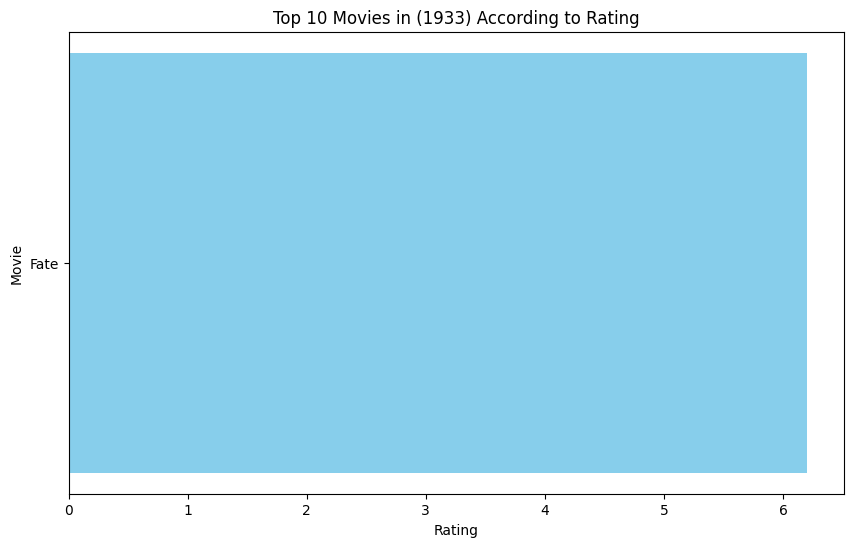

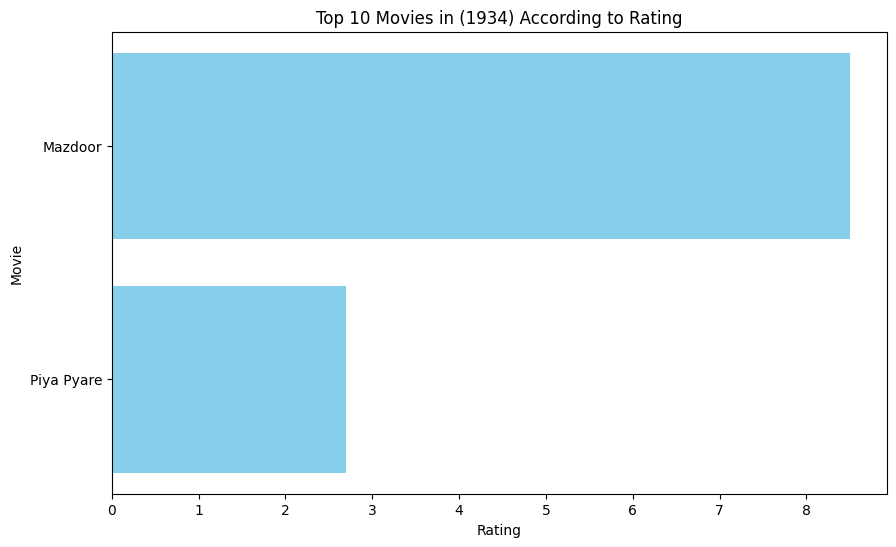

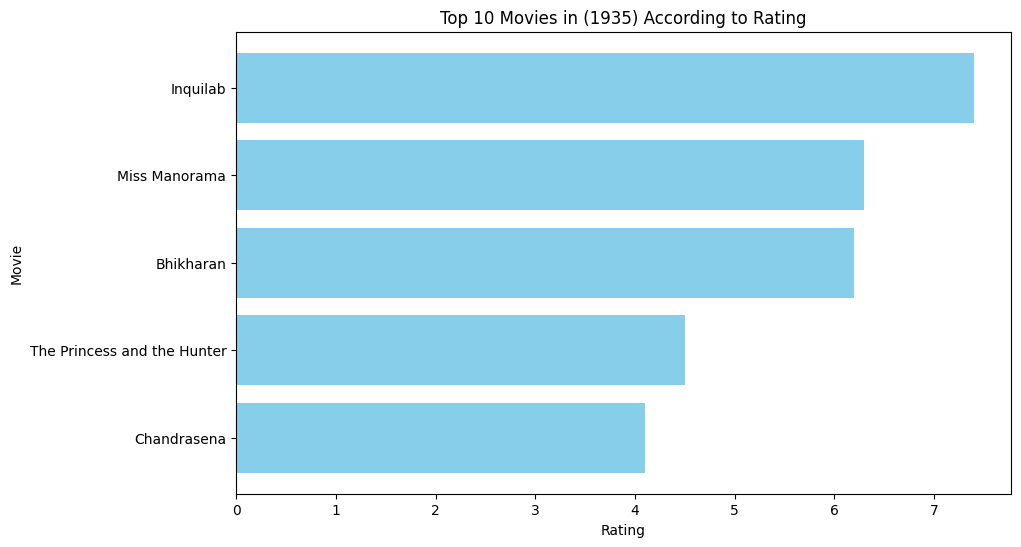

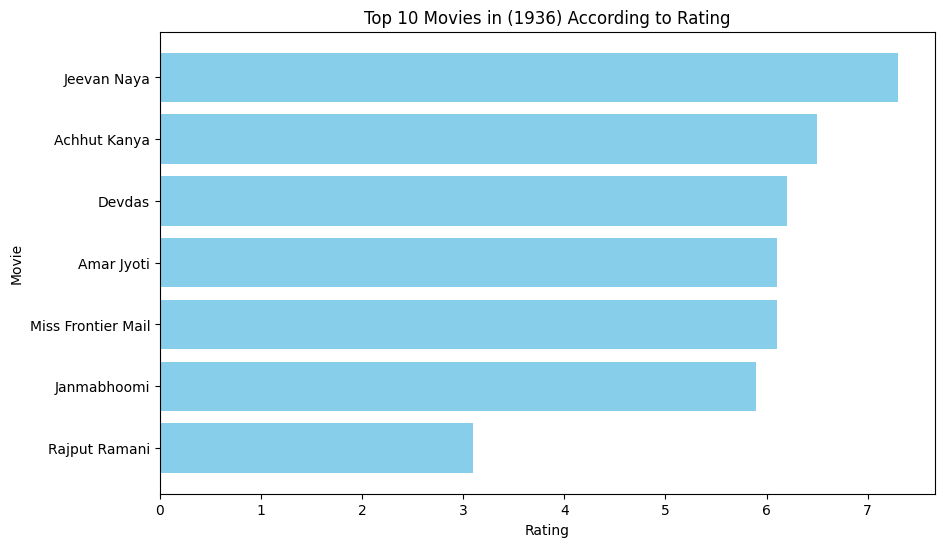

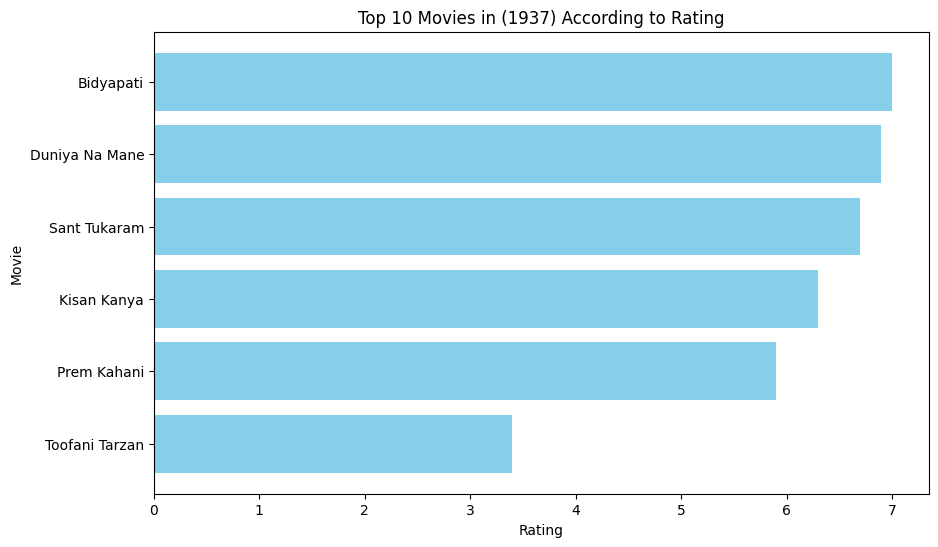

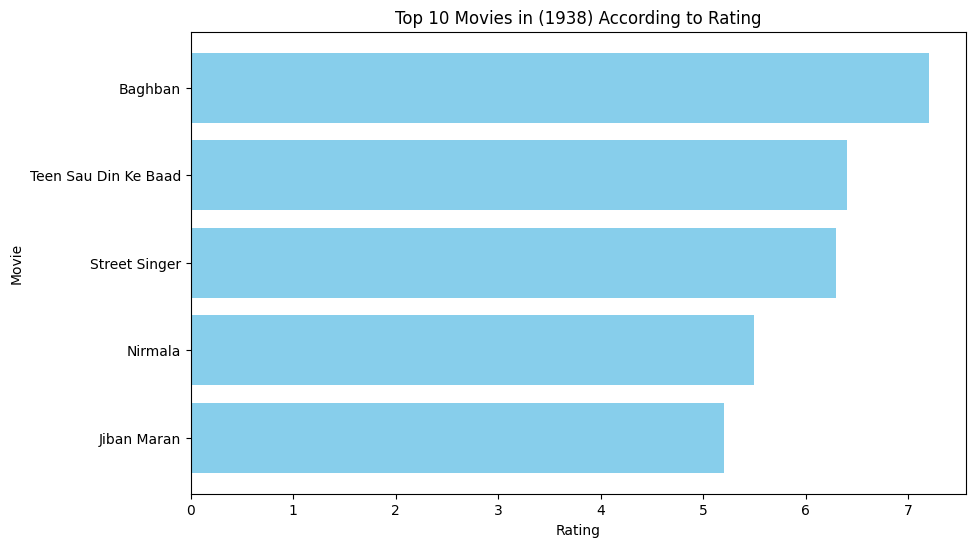

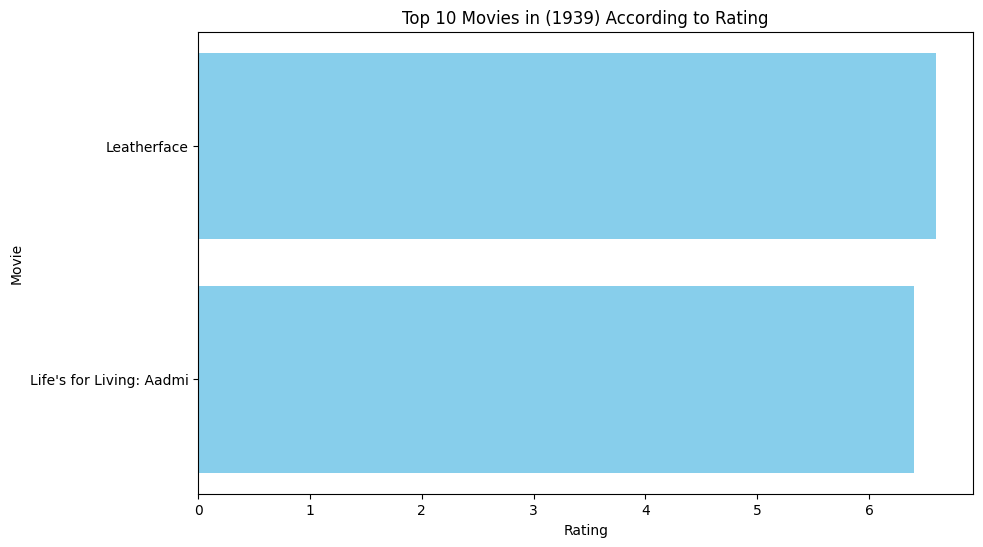

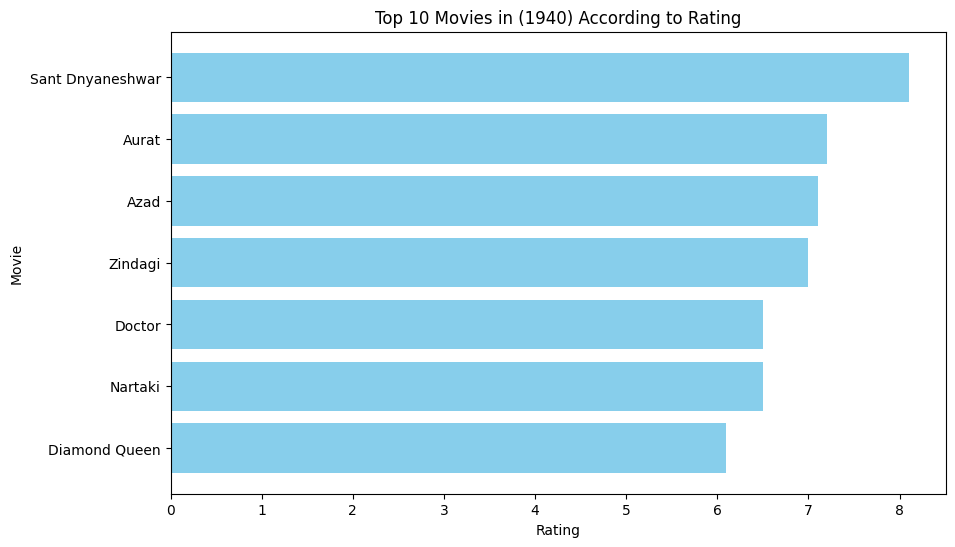

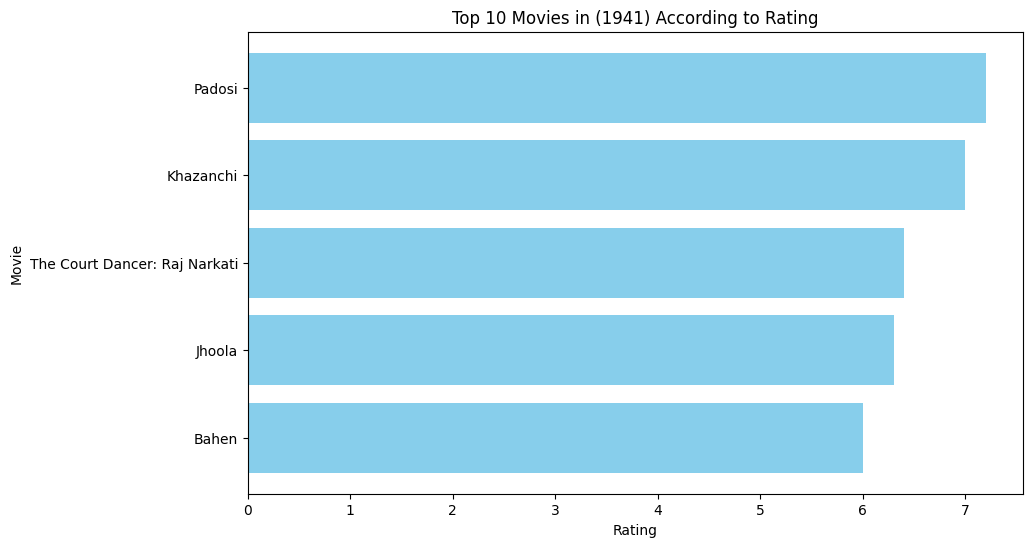

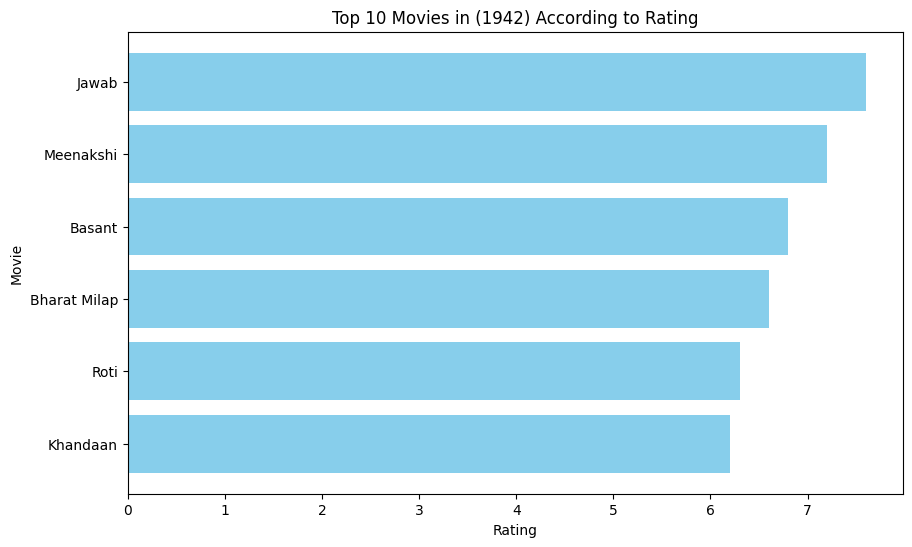

In [ ]:
for year, group in top_10_movies_rating_per_year.groupby('Year'):
    plt.figure(figsize=(10, 6))
    plt.barh(group['Name'], group['Rating'], color='skyblue')
    plt.xlabel('Rating')
    plt.ylabel('Movie')
    plt.title(f'Top 10 Movies in {year} According to Rating')
    plt.gca().invert_yaxis()  # Invert y-axis to display top-rated movies at the top
    plt.show()

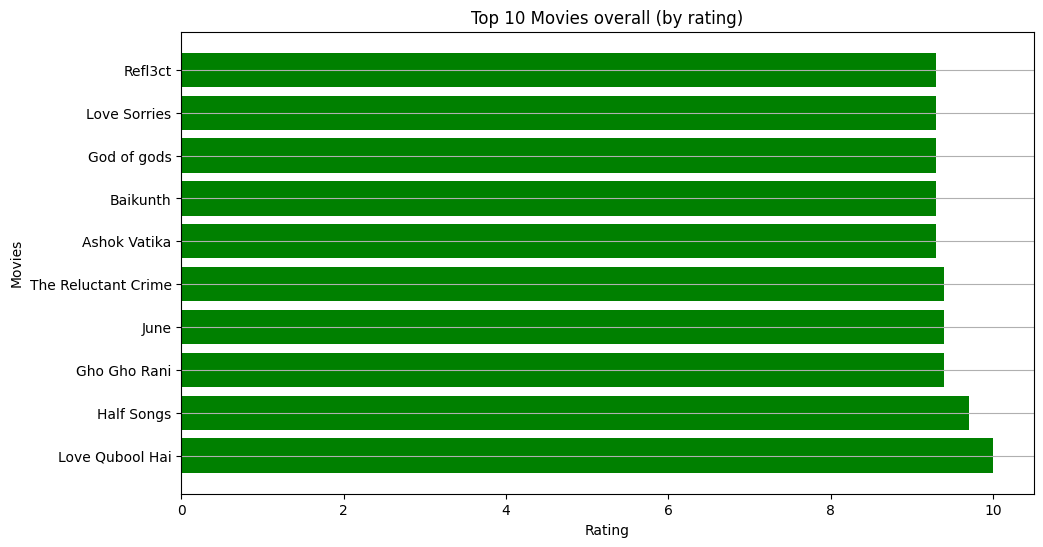

In [ ]:
# plotting top 10 overall
plt.figure(figsize = (11,6))
plt.barh(top_10_overall['Name'], top_10_overall['Rating'], color = 'green')
plt.title("Top 10 Movies overall (by rating)")
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.grid(axis = 'y')
plt.show()

#Observaitons:
- As per the observation 'Love Qubool hai' is the best movies overall by rating

In [ ]:
# Calculating movies released by year

movies_released_yearly = data['Year'].value_counts()
top_years = movies_released_yearly.head(10)
top_years

Year
(2019)    227
(2017)    211
(2018)    202
(2015)    177
(2016)    173
(2013)    167
(2014)    165
(2005)    141
(2012)    140
(2020)    140
Name: count, dtype: int64

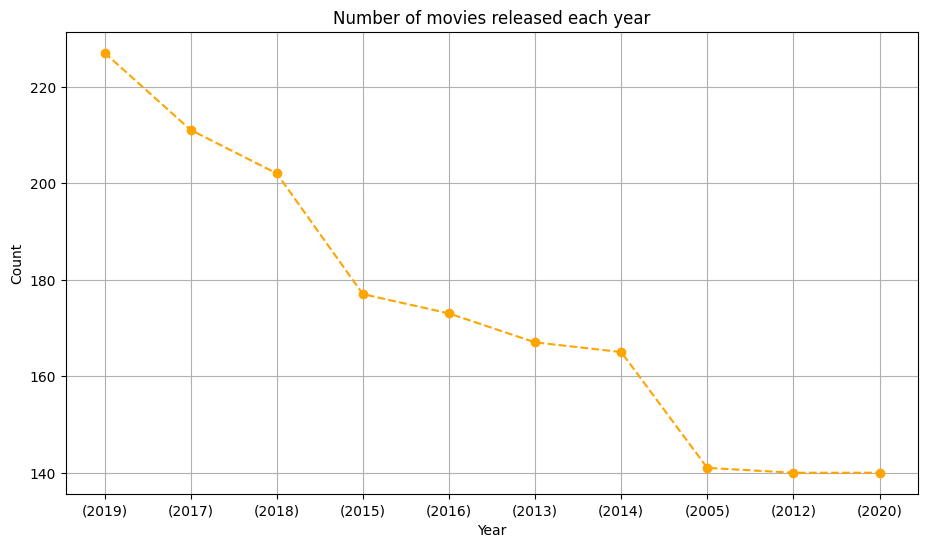

In [ ]:
plt.figure(figsize = (11,6))
plt.plot(top_years.index, top_years.values, color = 'orange', marker = 'o', linestyle = '--')
plt.title("Number of movies released each year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Observation:
- As we have seen that 227 movies released in 2019 and In very least movies released in 2020

# Number of popular  Movies released each year

In [ ]:
data['Year'] = data['Year'].str.strip('()').astype(int)

In [ ]:
threshold_popularity = 6.0
popular_movies = data[data['Rating']>threshold_popularity]
popular_movies_count = popular_movies.groupby('Year').size()
popular_movies_count

Year
1931      1
1933      1
1934      1
1935      3
1936      5
       ... 
2017    109
2018    111
2019    130
2020     86
2021     40
Length: 90, dtype: int64

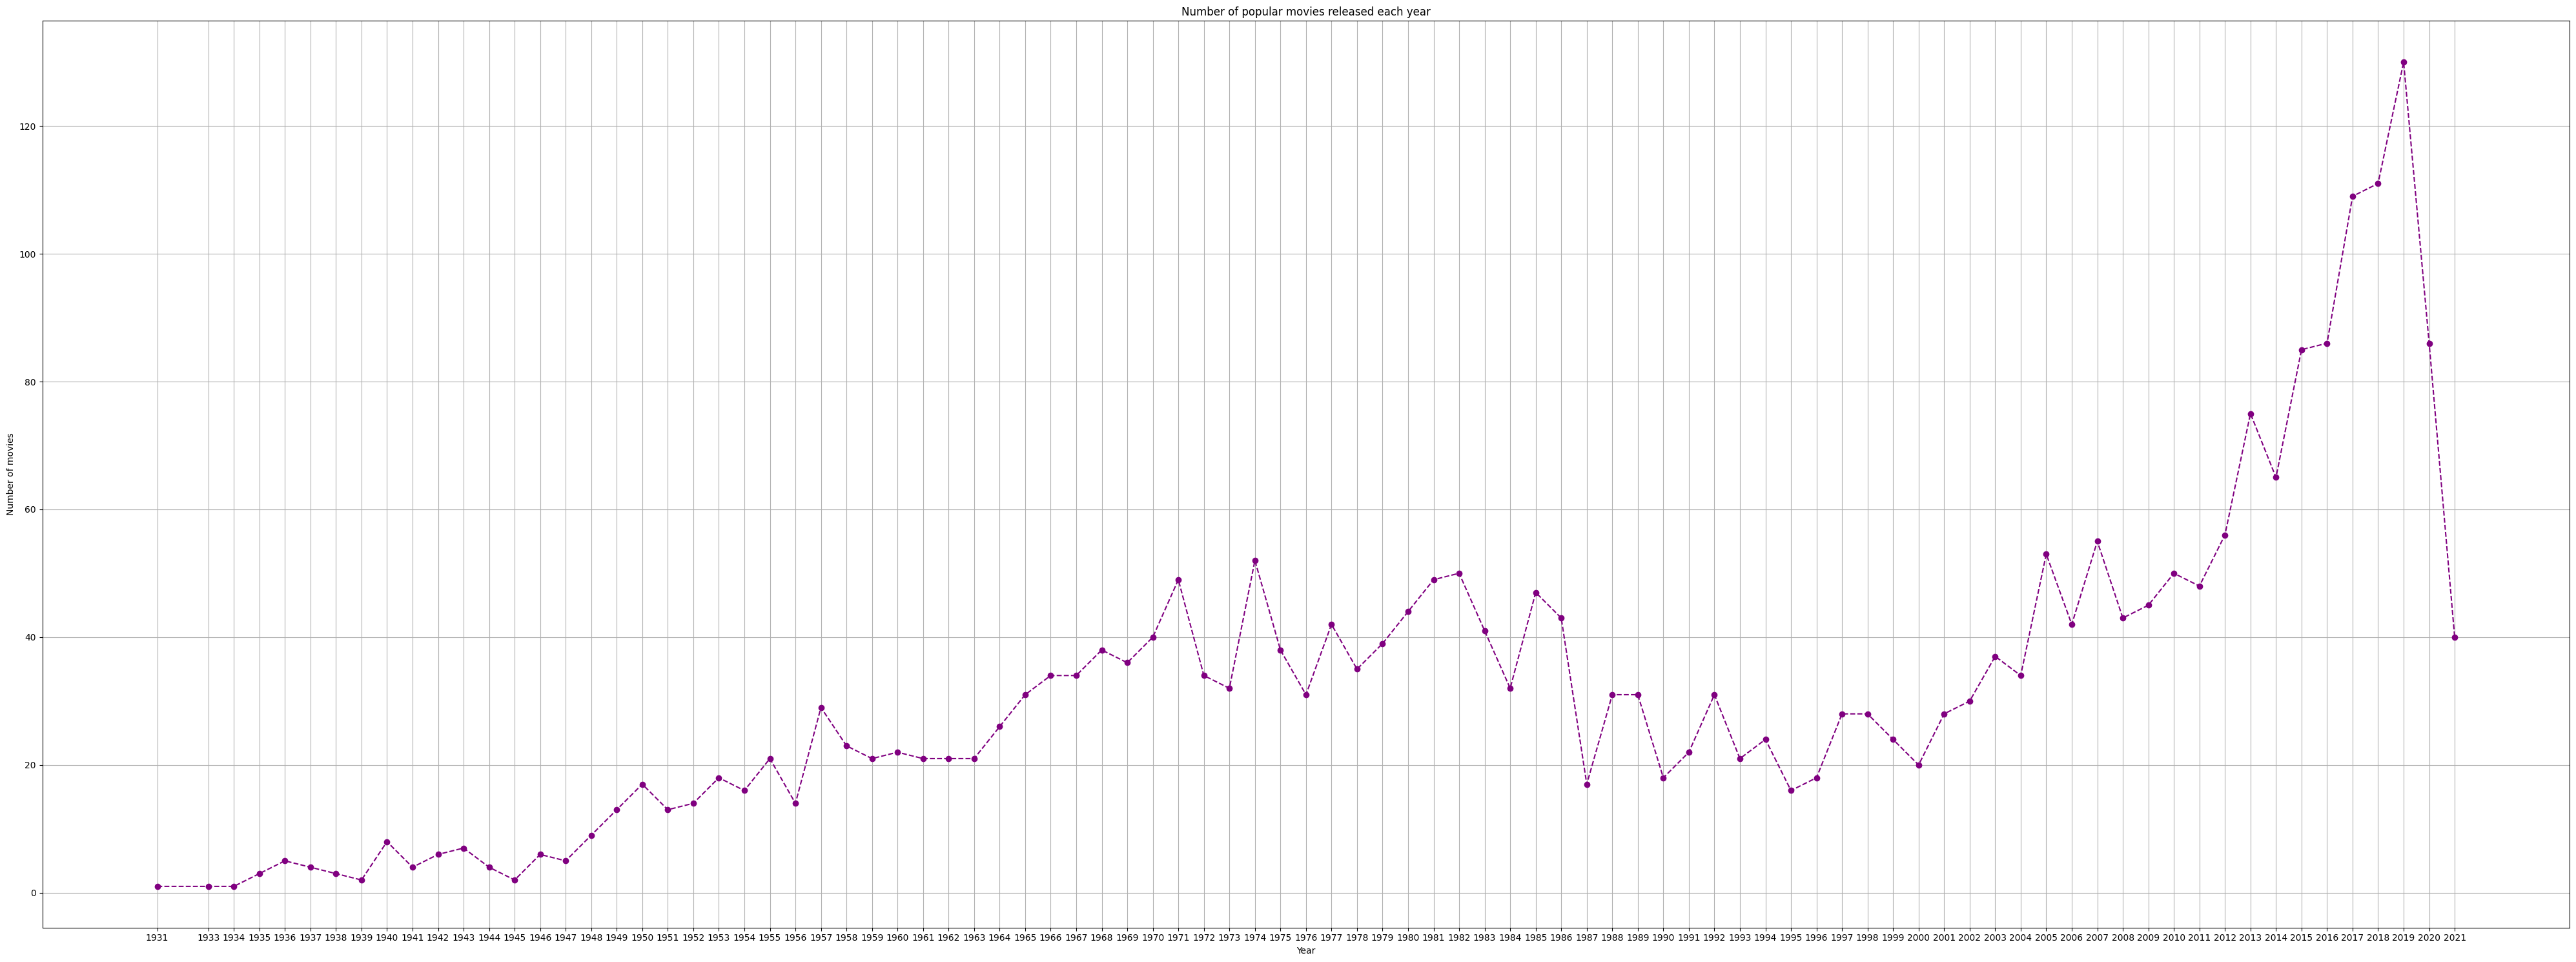

In [31]:
plt.figure(figsize = (40,15))
plt.plot(popular_movies_count.index, popular_movies_count.values, color = 'purple', marker = 'o', linestyle = '--')
plt.title("Number of popular movies released each year")
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.xticks(popular_movies_count.index)
plt.tight_layout()
plt.grid(True)
plt.show()

# Counting the number of votes which movies preformed better in rating per year and overall.

In [36]:
#Calculate the movies with highest rating per year
top_rated_movie = data.loc[data.groupby('Year')['Rating'].idxmax()]
top_rated_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
14161,The Light of the World,1931,124 min,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
6073,Indrasabha,1932,211 min,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
4658,Fate,1933,68 min,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
9053,Mazdoor,1934,155 min,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
6087,Inquilab,1935,144 min,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...
11841,Rediscovering India,2017,124 min,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
1314,Ashok Vatika,2018,97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5077,Gho Gho Rani,2019,105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
8339,Love Qubool Hai,2020,94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [39]:
#Get the movies with highest rating overall
top_rated_overall = data.loc[data['Rating'].idxmax()]
top_rated_overall

Name            Love Qubool Hai
Year                       2020
Duration                 94 min
Genre            Drama, Romance
Rating                     10.0
Votes                         5
Director        Saif Ali Sayeed
Actor 1               Ahaan Jha
Actor 2          Mahesh Narayan
Actor 3     Rajasree Rajakumari
Name: 8339, dtype: object

In [50]:
# Calculating the number of votes

total_votes_yearly = top_rated_movie.groupby('Year')['Votes'].sum()
top_total_votes_yearly = total_votes_yearly.head(10)
top_total_votes_yearly

Year
1931    112
1932     12
1933     12
1934      6
1935     38
1936      6
1937     23
1938      8
1939      8
1940      9
Name: Votes, dtype: object

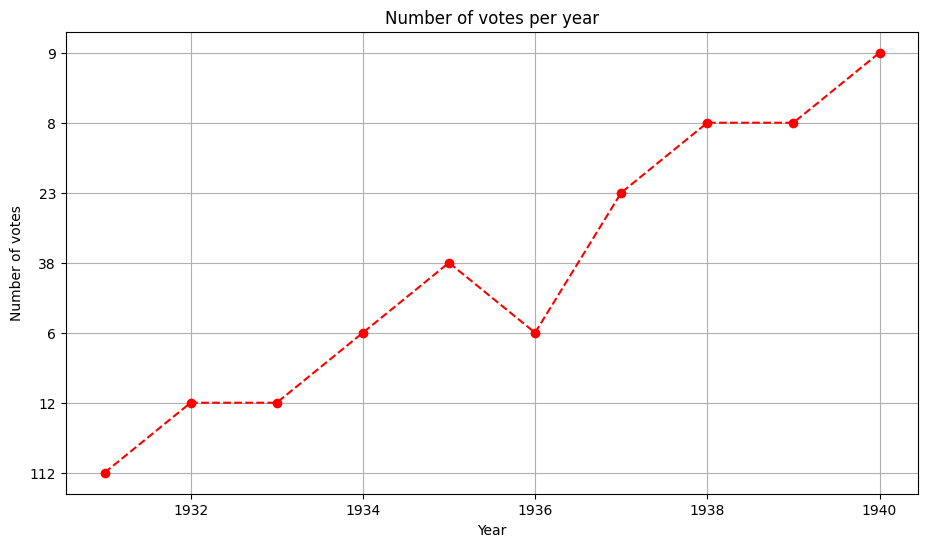

In [52]:
plt.figure(figsize = (11,6))
plt.plot(top_total_votes_yearly.index, top_total_votes_yearly.values, color = 'red', marker = 'o', linestyle = '--')
plt.title("Number of votes per year")
plt.xlabel('Year')
plt.ylabel('Number of votes')
plt.grid(True)
plt.show()


# Which director directed the most movies

In [65]:
director_count = data['Director'].value_counts()
top_15_director = director_count.head(15)
top_15_director

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
K. Bapaiah              22
Kanti Shah              21
Harmesh Malhotra        21
Shyam Ramsay            20
Name: count, dtype: int64

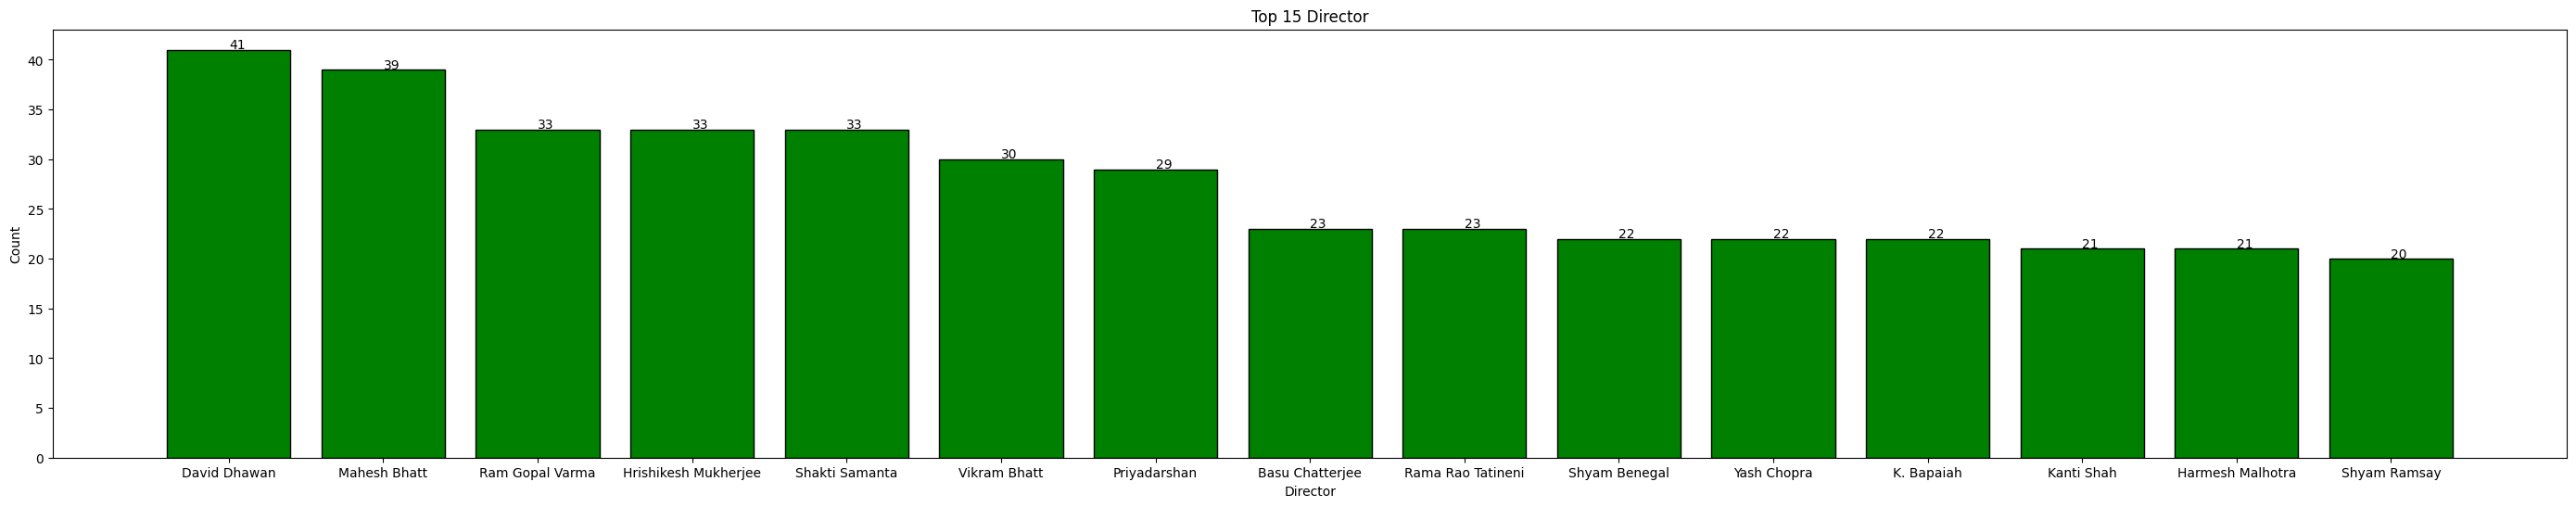

In [69]:
plt.figure(figsize = (35,6))
plt.bar(top_15_director.index, top_15_director.values, color = 'green', edgecolor = 'black')
for index, value in enumerate(top_15_director):
  plt.text(index, value + 0.1, str(value))
plt.title("Top 15 Director")
plt.xlabel("Director")
plt.ylabel('Count')
plt.show()


Observation:
- In the Bollywood Industry **David Dhawan** is the top director who directed the maximum movies

# Which actor starred in the movie

In [72]:
# To calculate all actors
all_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])


In [79]:
# To calculate the count of all actors
all_actors_count = all_actors.value_counts()
top_actors_count = all_actors_count.head()
top_actors_count

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Name: count, dtype: int64

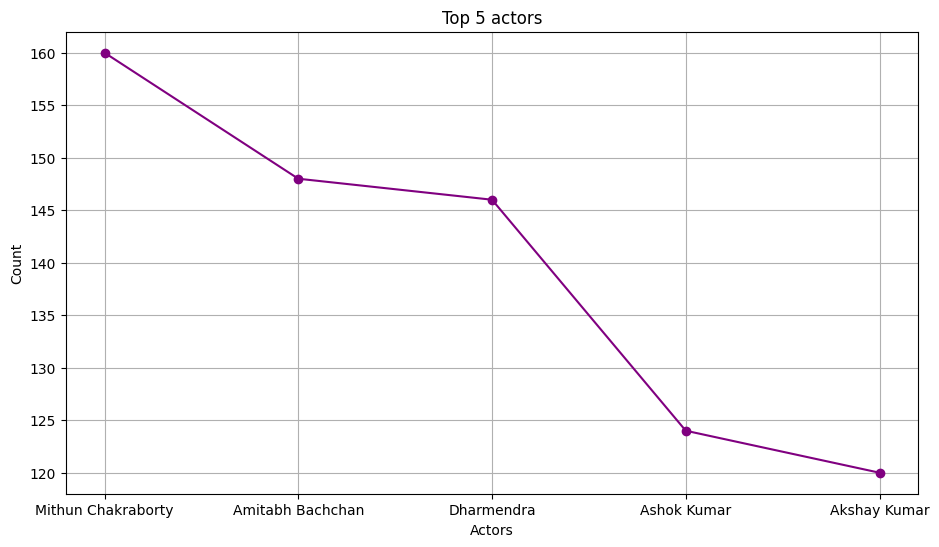

In [80]:
plt.figure(figsize = (11,6))
plt.plot(top_actors_count.index, top_actors_count.values, color = 'Purple', marker = 'o', linestyle = '-')
plt.title("Top 5 actors")
plt.xlabel('Actors')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# WORLD CLOUD OF STARRED ACTORS

In [96]:
pip install wordcloud

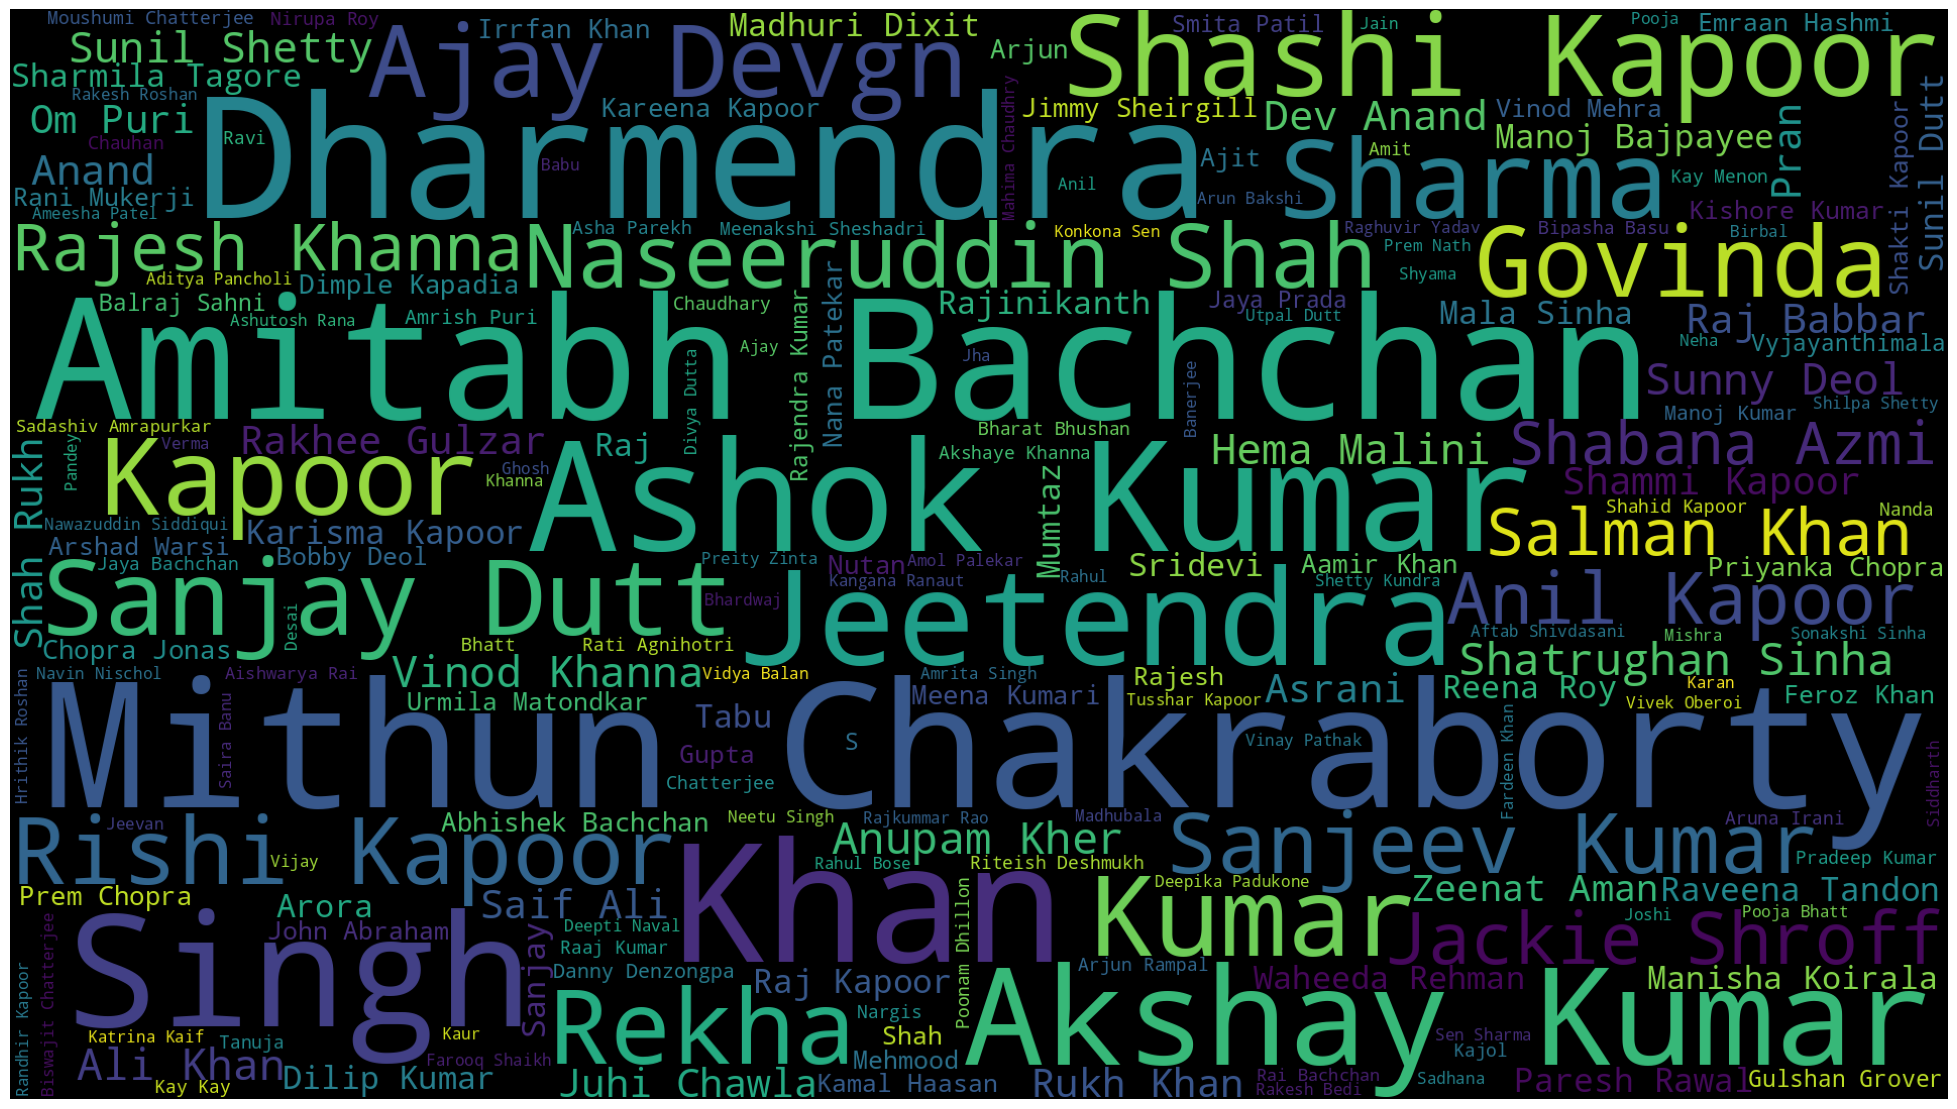

In [109]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(all_actors))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('actor.png')
plt.show()

In [90]:
top_genre_count = data['Genre'].value_counts()
top_genre = top_genre_count.head()
top_genre

Genre
Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: count, dtype: int64

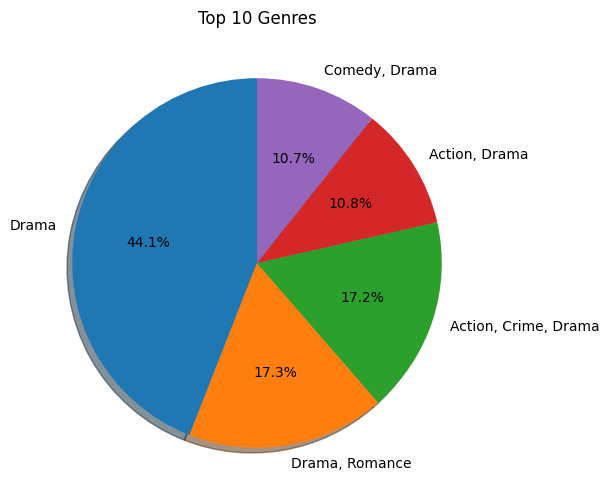

In [91]:
plt.figure(figsize = (11,6))
plt.pie(top_genre, labels = top_genre.index, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title("Top 10 Genres")
plt.show()